In [ ]:
# !pip install seaborn --user

In [1]:
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as smf
import matplotlib.pyplot as plt


In [2]:
# Import Drive API and authenticate.
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
tweets = pd.DataFrame() 
tweets = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/tweets_df_IC.csv', index_col='Date') 

tweets 

,1,IC_raw_tweets,3
Date,,,
2022-12-08 13:28:38+00:00,1600844803746729984,gm to all our peers building composable protoc...,indexcoop
2022-12-07 21:05:48+00:00,1600597468563083264,@NineFigsXBT only need 5 figs!,indexcoop
2022-12-07 18:51:15+00:00,1600563608659927041,$dsETH: Decentralize the Network | Diversify y...,indexcoop
2022-12-07 18:51:15+00:00,1600563607087054848,Great report on Ethereum's Liquid Staking Land...,indexcoop
2022-12-07 18:42:13+00:00,1600561333711216640,@MessariCrypto almost time for a $scale index\...,indexcoop
...,...,...,...
2020-10-06 07:00:00+00:00,1313373424140525573,Xtreme Owl https://t.co/CJ8IDQpjtj,indexcoop
2020-10-06 04:00:00+00:00,1313328126768738304,Elf Owl (Micrathene whitneyi) https://t.co/k27...,indexcoop
2020-10-06 01:00:01+00:00,1313282830831693831,Desert Tawny Owl (Strix hadorami) https://t.co...,indexcoop


In [6]:
def clean_text(text):
#will replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)  
    #To remove the punctuations
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
    #will consider only alphabets and numerics
    text = re.sub('[^a-zA-Z]',' ',text)  
    #will replace newline with space
    text = re.sub("\n"," ",text)
    #will convert to lower case
    text = text.lower()
    # will split and join the words
    text=' '.join(text.split())
    return text 

In [7]:
tweets['clean_tweets'] = tweets['IC_raw_tweets'].apply(clean_text) 

tweets 

,1,IC_raw_tweets,3,clean_tweets
Date,,,,
2022-12-08 13:28:38+00:00,1600844803746729984,gm to all our peers building composable protoc...,indexcoop,gm to all our peers building composable protoc...
2022-12-07 21:05:48+00:00,1600597468563083264,@NineFigsXBT only need 5 figs!,indexcoop,ninefigsxbt only need figs
2022-12-07 18:51:15+00:00,1600563608659927041,$dsETH: Decentralize the Network | Diversify y...,indexcoop,dseth decentralize the network diversify your ...
2022-12-07 18:51:15+00:00,1600563607087054848,Great report on Ethereum's Liquid Staking Land...,indexcoop,great report on ethereums liquid staking lands...
2022-12-07 18:42:13+00:00,1600561333711216640,@MessariCrypto almost time for a $scale index\...,indexcoop,messaricrypto almost time for a scale index ju...
...,...,...,...,...
2020-10-06 07:00:00+00:00,1313373424140525573,Xtreme Owl https://t.co/CJ8IDQpjtj,indexcoop,xtreme owl httpstcocj idqpjtj
2020-10-06 04:00:00+00:00,1313328126768738304,Elf Owl (Micrathene whitneyi) https://t.co/k27...,indexcoop,elf owl micrathene whitneyi httpstcok u lumnp
2020-10-06 01:00:01+00:00,1313282830831693831,Desert Tawny Owl (Strix hadorami) https://t.co...,indexcoop,desert tawny owl strix hadorami httpstco dbqrlhe


In [ ]:
# !pip install -U spacy

In [8]:
import spacy
sp = spacy.load('en_core_web_sm')
sw_spacy = sp.Defaults.stop_words
# print(sw_spacy)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [9]:
def remove_sw(text):
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text 

In [10]:
tweets['clean_sw'] = tweets['clean_tweets'].apply(remove_sw) 

tweets 

,1,IC_raw_tweets,3,clean_tweets,clean_sw
Date,,,,,
2022-12-08 13:28:38+00:00,1600844803746729984,gm to all our peers building composable protoc...,indexcoop,gm to all our peers building composable protoc...,gm peers building composable protocols ethereu...
2022-12-07 21:05:48+00:00,1600597468563083264,@NineFigsXBT only need 5 figs!,indexcoop,ninefigsxbt only need figs,ninefigsxbt need figs
2022-12-07 18:51:15+00:00,1600563608659927041,$dsETH: Decentralize the Network | Diversify y...,indexcoop,dseth decentralize the network diversify your ...,dseth decentralize network diversify portfolio...
2022-12-07 18:51:15+00:00,1600563607087054848,Great report on Ethereum's Liquid Staking Land...,indexcoop,great report on ethereums liquid staking lands...,great report ethereums liquid staking landscap...
2022-12-07 18:42:13+00:00,1600561333711216640,@MessariCrypto almost time for a $scale index\...,indexcoop,messaricrypto almost time for a scale index ju...,messaricrypto time scale index need arbitrum a...
...,...,...,...,...,...
2020-10-06 07:00:00+00:00,1313373424140525573,Xtreme Owl https://t.co/CJ8IDQpjtj,indexcoop,xtreme owl httpstcocj idqpjtj,xtreme owl httpstcocj idqpjtj
2020-10-06 04:00:00+00:00,1313328126768738304,Elf Owl (Micrathene whitneyi) https://t.co/k27...,indexcoop,elf owl micrathene whitneyi httpstcok u lumnp,elf owl micrathene whitneyi httpstcok u lumnp
2020-10-06 01:00:01+00:00,1313282830831693831,Desert Tawny Owl (Strix hadorami) https://t.co...,indexcoop,desert tawny owl strix hadorami httpstco dbqrlhe,desert tawny owl strix hadorami httpstco dbqrlhe


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

In [12]:
tweets['subj'] = tweets['clean_sw'].apply(getSubjectivity) 
tweets['pol'] = tweets['clean_sw'].apply(getPolarity) 
tweets 

,1,IC_raw_tweets,3,clean_tweets,clean_sw,subj,pol
Date,,,,,,,
2022-12-08 13:28:38+00:00,1600844803746729984,gm to all our peers building composable protoc...,indexcoop,gm to all our peers building composable protoc...,gm peers building composable protocols ethereu...,0.000000,0.000000
2022-12-07 21:05:48+00:00,1600597468563083264,@NineFigsXBT only need 5 figs!,indexcoop,ninefigsxbt only need figs,ninefigsxbt need figs,0.000000,0.000000
2022-12-07 18:51:15+00:00,1600563608659927041,$dsETH: Decentralize the Network | Diversify y...,indexcoop,dseth decentralize the network diversify your ...,dseth decentralize network diversify portfolio...,0.000000,0.000000
2022-12-07 18:51:15+00:00,1600563607087054848,Great report on Ethereum's Liquid Staking Land...,indexcoop,great report on ethereums liquid staking lands...,great report ethereums liquid staking landscap...,0.469196,0.247768
2022-12-07 18:42:13+00:00,1600561333711216640,@MessariCrypto almost time for a $scale index\...,indexcoop,messaricrypto almost time for a scale index ju...,messaricrypto time scale index need arbitrum a...,0.000000,0.000000
...,...,...,...,...,...,...,...
2020-10-06 07:00:00+00:00,1313373424140525573,Xtreme Owl https://t.co/CJ8IDQpjtj,indexcoop,xtreme owl httpstcocj idqpjtj,xtreme owl httpstcocj idqpjtj,0.000000,0.000000
2020-10-06 04:00:00+00:00,1313328126768738304,Elf Owl (Micrathene whitneyi) https://t.co/k27...,indexcoop,elf owl micrathene whitneyi httpstcok u lumnp,elf owl micrathene whitneyi httpstcok u lumnp,0.000000,0.000000
2020-10-06 01:00:01+00:00,1313282830831693831,Desert Tawny Owl (Strix hadorami) https://t.co...,indexcoop,desert tawny owl strix hadorami httpstco dbqrlhe,desert tawny owl strix hadorami httpstco dbqrlhe,0.000000,0.000000


In [16]:
tw_final = tweets.copy() 
tw_final

,1,IC_raw_tweets,3,clean_tweets,clean_sw,subj,pol
Date,,,,,,,
2022-12-08 13:28:38+00:00,1600844803746729984,gm to all our peers building composable protoc...,indexcoop,gm to all our peers building composable protoc...,gm peers building composable protocols ethereu...,0.000000,0.000000
2022-12-07 21:05:48+00:00,1600597468563083264,@NineFigsXBT only need 5 figs!,indexcoop,ninefigsxbt only need figs,ninefigsxbt need figs,0.000000,0.000000
2022-12-07 18:51:15+00:00,1600563608659927041,$dsETH: Decentralize the Network | Diversify y...,indexcoop,dseth decentralize the network diversify your ...,dseth decentralize network diversify portfolio...,0.000000,0.000000
2022-12-07 18:51:15+00:00,1600563607087054848,Great report on Ethereum's Liquid Staking Land...,indexcoop,great report on ethereums liquid staking lands...,great report ethereums liquid staking landscap...,0.469196,0.247768
2022-12-07 18:42:13+00:00,1600561333711216640,@MessariCrypto almost time for a $scale index\...,indexcoop,messaricrypto almost time for a scale index ju...,messaricrypto time scale index need arbitrum a...,0.000000,0.000000
...,...,...,...,...,...,...,...
2020-10-06 07:00:00+00:00,1313373424140525573,Xtreme Owl https://t.co/CJ8IDQpjtj,indexcoop,xtreme owl httpstcocj idqpjtj,xtreme owl httpstcocj idqpjtj,0.000000,0.000000
2020-10-06 04:00:00+00:00,1313328126768738304,Elf Owl (Micrathene whitneyi) https://t.co/k27...,indexcoop,elf owl micrathene whitneyi httpstcok u lumnp,elf owl micrathene whitneyi httpstcok u lumnp,0.000000,0.000000
2020-10-06 01:00:01+00:00,1313282830831693831,Desert Tawny Owl (Strix hadorami) https://t.co...,indexcoop,desert tawny owl strix hadorami httpstco dbqrlhe,desert tawny owl strix hadorami httpstco dbqrlhe,0.000000,0.000000


In [17]:
tw_final.drop(columns = ['1', '3', 'IC_raw_tweets', 'clean_tweets', 'clean_sw'], inplace=True)

tw_final 

,subj,pol
Date,,
2022-12-08 13:28:38+00:00,0.000000,0.000000
2022-12-07 21:05:48+00:00,0.000000,0.000000
2022-12-07 18:51:15+00:00,0.000000,0.000000
2022-12-07 18:51:15+00:00,0.469196,0.247768
2022-12-07 18:42:13+00:00,0.000000,0.000000
...,...,...
2020-10-06 07:00:00+00:00,0.000000,0.000000
2020-10-06 04:00:00+00:00,0.000000,0.000000
2020-10-06 01:00:01+00:00,0.000000,0.000000


In [18]:
tw_final.sort_index(inplace=True)
tw_final 

,subj,pol
Date,,
2020-10-05 19:00:02+00:00,0.000000,0.000000
2020-10-05 22:00:00+00:00,0.000000,0.000000
2020-10-06 01:00:01+00:00,0.000000,0.000000
2020-10-06 04:00:00+00:00,0.000000,0.000000
2020-10-06 07:00:00+00:00,0.000000,0.000000
...,...,...
2022-12-07 18:42:13+00:00,0.000000,0.000000
2022-12-07 18:51:15+00:00,0.469196,0.247768
2022-12-07 18:51:15+00:00,0.000000,0.000000


In [19]:
tw_final.index = tw_final.index.astype('datetime64[ns]')
tw_final 

,subj,pol
Date,,
2020-10-05 19:00:02,0.000000,0.000000
2020-10-05 22:00:00,0.000000,0.000000
2020-10-06 01:00:01,0.000000,0.000000
2020-10-06 04:00:00,0.000000,0.000000
2020-10-06 07:00:00,0.000000,0.000000
...,...,...
2022-12-07 18:42:13,0.000000,0.000000
2022-12-07 18:51:15,0.469196,0.247768
2022-12-07 18:51:15,0.000000,0.000000


In [20]:
avg = tw_final.resample('D').mean()

avg 


# avg_polarity.dropna(inplace=True)
# avg_polarity.index = avg_polarity.index.rename('Date')
# avg_polarity.index = avg_polarity.index.astype('datetime64[ns]') 
# avg_polarity

,subj,pol
Date,,
2020-10-05,0.000000,0.000000
2020-10-06,0.061806,0.018750
2020-10-07,0.281250,0.098011
2020-10-08,0.307143,0.250000
2020-10-09,1.000000,0.800000
...,...,...
2022-12-04,0.170996,0.098918
2022-12-05,0.228571,0.045238
2022-12-06,0.169643,0.036526


In [21]:
avg.fillna(method="ffill", inplace=True)
avg

,subj,pol
Date,,
2020-10-05,0.000000,0.000000
2020-10-06,0.061806,0.018750
2020-10-07,0.281250,0.098011
2020-10-08,0.307143,0.250000
2020-10-09,1.000000,0.800000
...,...,...
2022-12-04,0.170996,0.098918
2022-12-05,0.228571,0.045238
2022-12-06,0.169643,0.036526


In [22]:
avg.to_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/avg_pol_IC_acct.csv', index=True) 

In [23]:
## checking for correlation of twitter polarity with netflow 

avg_pol = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/avg_pol_IC_acct.csv', index_col='Date')  
DPI = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_aum_netflow_2.csv', index_col='Date')  

In [24]:
DPI.index = DPI.index.astype('datetime64[ns]')
DPI 

,aum,net_flow,DPI_price
Date,,,
2020-09-10,9.699631e+02,969.963123,456.753025
2020-09-11,6.203445e+03,5854.244309,130.083626
2020-09-12,1.040195e+04,2931.811780,132.866086
2020-09-13,1.858037e+05,175075.408946,136.837190
2020-09-14,6.341173e+05,461649.081363,129.020509
...,...,...,...
2022-10-01,3.005462e+07,-0.823180,81.524879
2022-10-02,2.944343e+07,18624.325293,80.428076
2022-10-03,2.967774e+07,0.000000,80.371455


In [25]:
avg_pol.index = avg_pol.index.astype('datetime64[ns]')
avg_pol 

,subj,pol
Date,,
2020-10-05,0.000000,0.000000
2020-10-06,0.061806,0.018750
2020-10-07,0.281250,0.098011
2020-10-08,0.307143,0.250000
2020-10-09,1.000000,0.800000
...,...,...
2022-12-04,0.170996,0.098918
2022-12-05,0.228571,0.045238
2022-12-06,0.169643,0.036526


In [26]:
fin_df = pd.concat([DPI, avg_pol], axis=1) 
fin_df 

,aum,net_flow,DPI_price,subj,pol
Date,,,,,
2020-09-10,969.963123,969.963123,456.753025,NaN,NaN
2020-09-11,6203.445098,5854.244309,130.083626,NaN,NaN
2020-09-12,10401.951550,2931.811780,132.866086,NaN,NaN
2020-09-13,185803.679830,175075.408946,136.837190,NaN,NaN
2020-09-14,634117.346404,461649.081363,129.020509,NaN,NaN
...,...,...,...,...,...
2022-12-04,NaN,NaN,NaN,0.170996,0.098918
2022-12-05,NaN,NaN,NaN,0.228571,0.045238
2022-12-06,NaN,NaN,NaN,0.169643,0.036526


In [27]:
fin_df.dropna(inplace=True) 
fin_df 

,aum,net_flow,DPI_price,subj,pol
Date,,,,,
2020-10-05,2.073774e+06,2.760747e+04,91.856774,0.000000,0.000000
2020-10-06,2.350034e+06,4.854019e+05,80.905885,0.061806,0.018750
2020-10-07,5.285751e+06,3.082210e+06,78.890862,0.281250,0.098011
2020-10-08,8.386002e+06,2.701780e+06,83.567275,0.307143,0.250000
2020-10-09,1.218568e+07,3.601618e+06,87.402546,1.000000,0.800000
...,...,...,...,...,...
2022-10-01,3.005462e+07,-8.231797e-01,81.524879,0.297348,0.036195
2022-10-02,2.944343e+07,1.862433e+04,80.428076,0.170996,0.098918
2022-10-03,2.967774e+07,0.000000e+00,80.371455,0.073697,0.005576


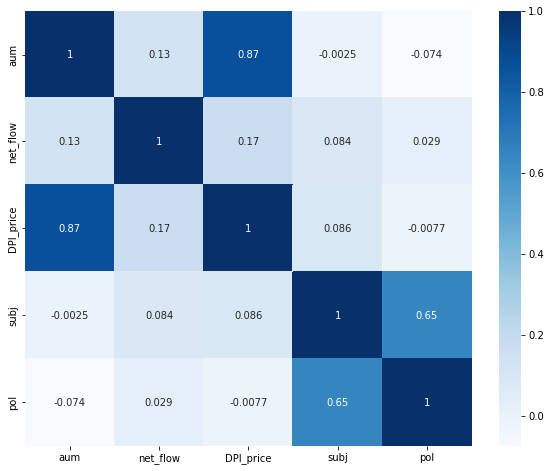

In [28]:
import seaborn as sns 
corr = fin_df.corr()
corr 
plt.figure(figsize = (10,8)) 
sns.heatmap(corr, cmap="Blues", annot=True) 

In [29]:
final_df_scaled = pd.DataFrame(preprocessing.scale(fin_df))
final_df_scaled.columns = fin_df.columns 
final_df_scaled 

,aum,net_flow,DPI_price,subj,pol
0,-1.556341,-0.101488,-1.075444,-1.301723,-0.772166
1,-1.551959,0.231076,-1.153813,-0.987329,-0.631973
2,-1.505394,2.117525,-1.168233,0.128944,-0.039337
3,-1.456219,1.841162,-1.134767,0.260656,1.097078
4,-1.395950,2.494848,-1.107320,3.785094,5.209415
...,...,...,...,...,...
726,-1.112520,-0.121545,-1.149383,0.210834,-0.501535
727,-1.122214,-0.108014,-1.157232,-0.431899,-0.032560
728,-1.118498,-0.121544,-1.157637,-0.926840,-0.730476
729,-1.100695,-0.121544,-1.129925,-1.301723,-0.772166


In [30]:
# Linear regression - Polarity &subjectivity
LR_df = final_df_scaled.copy()
# LR_df.replace([np.inf, -np.inf], np.nan, inplace=True) 
# LR_df.dropna(inplace=True)

X = LR_df.copy() 
X = X.drop(columns=['net_flow'])


# Y = final_df['ETH-USD']
Y = fin_df['net_flow'] 
Y = Y.reset_index() 
Y.drop(columns=['Date'], inplace=True) 


In [ ]:
X

,aum,DPI_price,DPI_subj,DPI_pol
0,-1.561423,-1.068505,0.079831,1.601485
1,-1.557556,-1.055683,2.411785,3.364675
2,-1.557836,-1.076262,-2.383392,-0.987885
3,-1.557814,-1.083502,-2.383392,-0.987885
4,-1.553440,-1.161972,1.896663,0.887149
...,...,...,...,...
722,-1.137116,-1.168122,0.594979,1.084762
723,-1.144119,-1.173270,1.414031,0.566601
724,-1.155231,-1.187157,1.339572,1.602924
725,-1.125875,-1.152920,-1.127894,-0.200678


In [31]:
X_train = X.iloc[:650]
X_test = X.iloc[650:]

Y_train = Y.iloc[:650]
Y_test = Y.iloc[650:]

LR = LinearRegression().fit(X_train, Y_train)

Y_pred_train = LR.predict(X_train)
Y_pred = LR.predict(X_test) 

In [32]:
Y_test

,net_flow
650,0.000000
651,0.000000
652,0.000000
653,0.000000
654,0.000000
...,...
726,-0.823180
727,18624.325293
728,0.000000
729,0.000000


In [33]:
statistics_LR = smf.OLS(Y, smf.add_constant(X))
lR_summ = statistics_LR.fit()
lR_summ.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               net_flow   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.284
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           5.67e-05
Time:                        21:32:50   Log-Likelihood:                -11358.
No. Observations:                 731   AIC:                         2.273e+04
Df Residuals:                     726   BIC:                         2.275e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.673e+05   5.02e+04      3.331      0.001    6.87e+04    2.66e+05
aum        -5.912e+04   1.02e+05     -0.578      0.564    -2.6e+05    1.42e+05
DPI_price   2.703e+05   1.03e+05      2.635      0.009    6.89e+04    4.72e+05
subj        1.165e+05   6.68e+04      1.744      0.082   -1.46e+04    2.48e+05
pol        -3.797e+04   6.63e+04     -0.572      0.567   -1.68e+05    9.23e+04
==============================================================================
Omnibus:                      493.525   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80260.669
Skew:                          -2.019   Prob(JB):                         0.00
Kurtosis:                      54.174   Cond. No.                         3.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
rmse_train = r2_score(Y_train,Y_pred_train) 
rmse_test = r2_score(Y_test,Y_pred) 
print("R-squared training: {}".format(rmse_train)) 
print("R-squared test: {}".format(rmse_test)) 

R-squared training: 0.031493840674355233
R-squared test: -0.08053858683828197


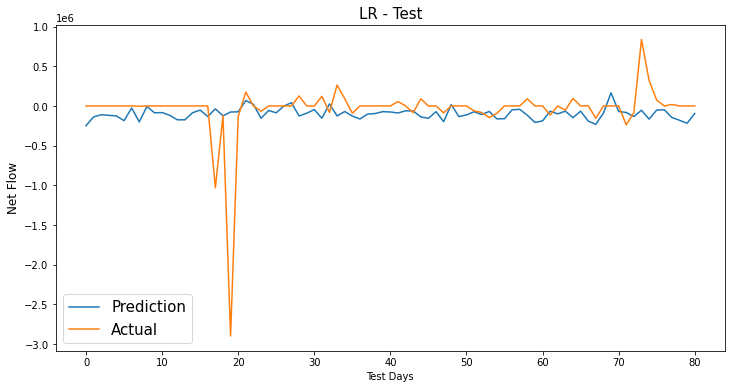

In [35]:
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("LR - Test", fontsize=15)
plt.plot(Y_pred, label="Prediction")
plt.plot(Y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png')

In [36]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if (score < 0):
        return 'Negative'
    elif (score == 0):
        return 'Neutral'
    else:
        return 'Positive'
    


In [37]:
analysis = avg_pol.copy()
analysis['analysis'] = analysis['pol'].apply(getAnalysis)
analysis

,subj,pol,analysis
Date,,,
2020-10-05,0.000000,0.000000,Neutral
2020-10-06,0.061806,0.018750,Positive
2020-10-07,0.281250,0.098011,Positive
2020-10-08,0.307143,0.250000,Positive
2020-10-09,1.000000,0.800000,Positive
...,...,...,...
2022-12-04,0.170996,0.098918,Positive
2022-12-05,0.228571,0.045238,Positive
2022-12-06,0.169643,0.036526,Positive


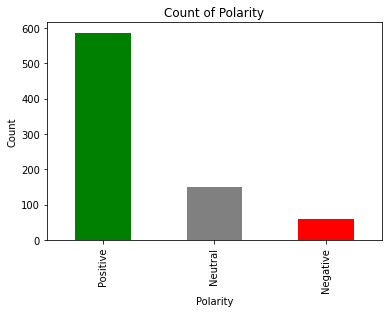

In [39]:
fig = plt.figure(figsize=(6,4))
color = ['green', 'grey', 'red']
analysis['analysis'].value_counts().plot(kind='bar', color = color)

plt.title('Count of Polarity')
plt.ylabel('Count') 
plt.xlabel('Polarity') 
plt.grid(False)
plt.show() 

In [40]:
def strictAnalysis(score):
    if (score < -0.3):
        return 'Negative'
    elif (score > 0.3):
        return 'Positive'
    else:
        return 'Neutral' 

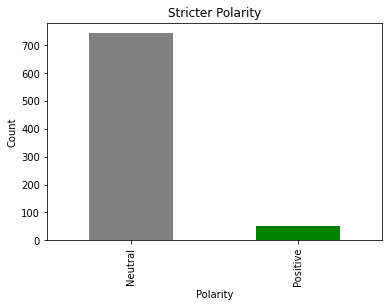

In [41]:
analysis['analStrict'] = analysis['pol'].apply(strictAnalysis) 

fig = plt.figure(figsize=(6,4))
color = ['grey','green','red']
analysis['analStrict'].value_counts().plot(kind='bar', color = color)

plt.title('Stricter Polarity')
plt.ylabel('Count') 
plt.xlabel('Polarity') 
plt.grid(False)
plt.show() 

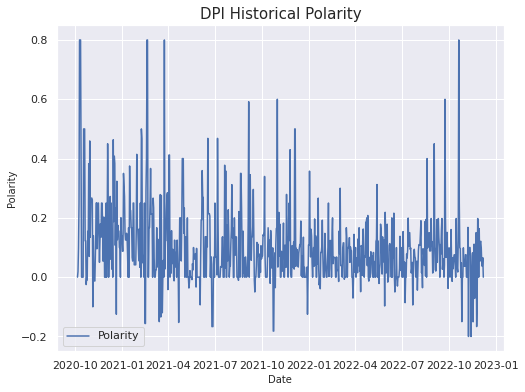

In [42]:
sns.set(rc={'figure.figsize': (8,6)})
plt.xlabel("Date", fontsize=10)
plt.ylabel("Polarity", fontsize=10)
plt.title("DPI Historical Polarity", fontsize=15)
plt.plot(analysis['pol'], label="Polarity")
plt.legend(loc='lower left')
# plt.savefig('Roll_futures.png') 